# Análise de Produção Científica do Centro de Informática da UFPB
**GRUPO:** Clarice Lopes, Felipe Medeiros, Vinícius Mangueira

## Introdução

Este trabalho tem como objetivo analisar a produção científica do Centro de Informática da Universidade Federal da Paraíba (UFPB) ao longo dos anos, a partir da coleta de dados de artigos científicos publicados por seus pesquisadores.

A motivação principal é entender padrões de publicação, áreas temáticas mais recorrentes e redes de colaboração entre autores, aplicando métodos estatísticos como regressão linear e visualizações como nuvem de palavras.

As perguntas norteadoras da análise são:
- Quais são as áreas de conhecimento mais frequentes nas publicações do Centro de Informática?
- A produção do Centro de Informática cresceu ou diminuiu ao longo dos anos?
- Os pesquisadores tendem a colaborar em pequenos grupos fechados ou redes mais amplas?

## Dados usados

Os dados foram extraídos de coletas automáticas a partir do Google Acadêmico, referentes a artigos de professores do Centro de Informática da UFPB.

- Cada arquivo CSV representa um grupo de professor, contendo informações como título do artigo, autores, data de publicação, conferência, editora, entre outras infomações.
- Além disso, foi gerado mais alguns arquivos CSV com dados específicos já minerados. 

### Exploração inicial dos dados

- Total de artigos coletados: 2501
- Intervalo de anos das publicações: 1984-2025
- Número de palavras-chave extraídas: 25 principais palavras

## Pré-processamento

### Passos realizados:

- **Extração de Títulos:** Utilizando os CSVs brutos, foram coletadas grupos pequenos de informações como os CSVs artigos_*_*.csv com nome dos professores e títulos dos seus artigos.
- **Extrações Gerais:** Foram coletadas infomações mais gerais que estão guardadas no arquivo analise.txt e é resultado do script analises.py
- **Organização dos dados:** Dados salvos em novos arquivos CSV para facilitar a análise posterior.

Todas essas etapas foram feitas para garantir que as informações pudessem ser usadas diretamente nas análises gráficas e estatísticas.

# Pergunta 1: Quais são as áreas de conhecimento mais frequentes nas publicações?

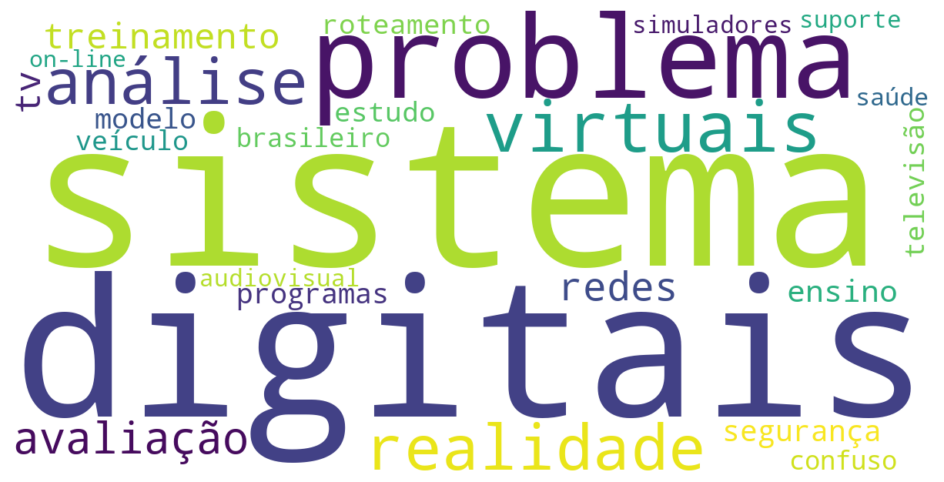

In [4]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

with open('captura_dados/palavras_chave.csv', encoding='utf-8') as f:
    linhas = f.readlines()

linhas = linhas[1:]

palavras = []
frequencias = []

for linha in linhas:
    if ';' in linha:
        palavra, freq = linha.strip().split(';')
        palavras.append(palavra.strip())
        frequencias.append(int(freq.strip()))

frequencias_dict = dict(zip(palavras, frequencias))

wordcloud = WordCloud(width=1200, height=600, background_color='white',
                      colormap='viridis').generate_from_frequencies(frequencias_dict)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Gráfico de Barras

Após essa visualização previa das palavras mais utilizada nos títulos dos artigos, segue um gráfico de barras que permite uma melhor apresentação dos valores encontrados.

### Passos realizados:
- **Contagem de palavras-chave:** As palavras dos títulos dos artigos foram processadas, removendo palavras comuns e contabilizando as mais frequentes. (palavras_chave.py)
- **Gráfico:** Construção de um gráfico de barras simples. (grafico_palavras.py)

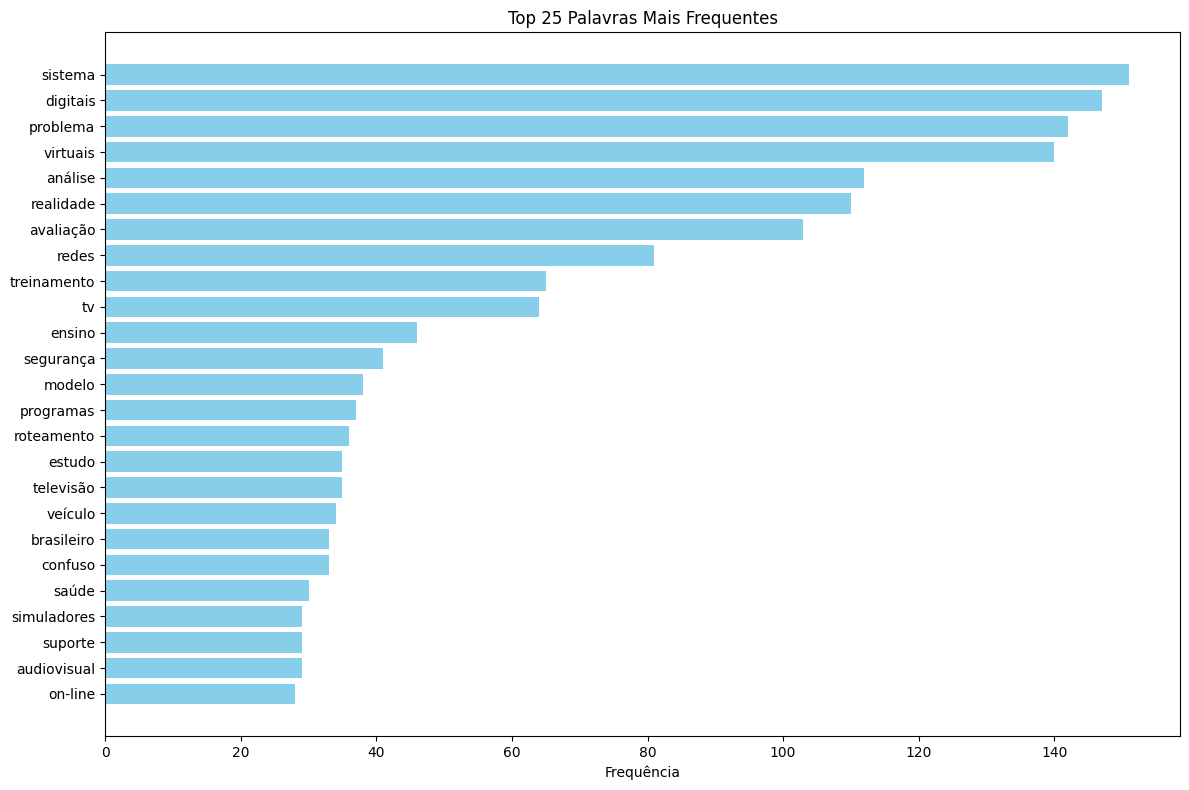

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('captura_dados/palavras.csv', sep=';', header=None, names=['palavra', 'frequencia'], encoding='utf-8')

df['palavra'] = df['palavra'].str.strip().str.lower()
df['frequencia'] = df['frequencia'].astype(int)

df_agrupado = df.groupby('palavra', as_index=False)['frequencia'].sum()

top_25 = df_agrupado.sort_values(by='frequencia', ascending=False).head(25)

plt.figure(figsize=(12, 8))
plt.barh(top_25['palavra'][::-1], top_25['frequencia'][::-1], color='skyblue')
plt.xlabel('Frequência')
plt.title('Top 25 Palavras Mais Frequentes')
plt.tight_layout()
plt.show()

## Análise dos Temas Abordados nas Publicações

A partir da nuvem de palavras construída com base nos títulos dos artigos coletados, foi possível identificar os temas mais recorrentes nas publicações do Centro de Informática da UFPB.  
As palavras mais frequentes foram **"sistema"**, **"digitais"**, **"problema"**, **"virtuais"**, **"análise"**, **"realidade"**, **"avaliação"**, **"redes"** e **"treinamento"**.

Essas palavras foram agrupadas para melhor interpretação dos temas abordados:

### Tecnologias Digitais e Realidade Virtual
A alta frequência das palavras **"digitais"**, **"realidade"**, **"virtuais"**, **"tv"**, **"televisão"** e **"audiovisual"** indica uma forte atuação em pesquisas envolvendo novas tecnologias digitais, realidade virtual e aplicações audiovisuais.

**Exemplos:**
- DERZU OMAIA - *TVGrid: computação em grid utilizando recursos de uma rede de TV digital*
- IGUATEMI EDUARDO DA FONSECA - *Ambiente computacional baseado em realidade virtual e interação natural para Treinamento no Setor Elétrico*

---

### Desenvolvimento de Sistemas Computacionais e Análise de Problemas
Termos como **"sistema"**, **"problema"**, **"análise"**, **"avaliação"** e **"suporte"** mostram que o desenvolvimento, avaliação e suporte de sistemas computacionais são áreas centrais de interesse.

**Exemplo:**
- ALISSON VASCONCELOS DE BRITO - *Análise de Relevância de Publicações em Sistemas Embarcados através de Análise da Rede de Termos e Citações*

---

### Redes de Comunicação e Roteamento
As palavras **"redes"** e **"roteamento"** apontam para a presença de pesquisas envolvendo infraestrutura de redes e protocolos de comunicação.

**Exemplo:**
- ANAND SUBRAMANIAN - *Multi-Priority Alternative Journey and Routing Protocol: um Algoritmo para Roteamento em Redes Tolerantes a Atrasos e Desconexões Previsíveis*

---

### Educação e Treinamento Baseados em Tecnologia
A presença das palavras **"ensino"**, **"treinamento"** e **"simuladores"** revela um foco em aplicações tecnológicas para educação e capacitação.

**Exemplos:**
- YUSKA PAOLA COSTA AGUIAR - *Impacto do apoio metodológico e ferramental a aspectos de usabilidade no ensino prático da engenharia de software*
- YURI MALHEIROS - *O ensino integrado de gestão de qualidade de software e engenharia de software aplicada como modelo de educação interdisciplinar: Um relato de experiência no ensino de graduação*

---

### Aplicações em Saúde e Contexto Social
Palavras como **"saúde"** e **"brasileiro"** indicam o desenvolvimento de soluções voltadas para a área médica e para realidades sociais específicas do Brasil.

**Exemplo:**
- NATASHA CORREIA QUEIROZ LINO - *Um Estudo sobre a Contribuição de Ontologias para a Educação suportada por Tecnologias da Informação no Domínio da Saúde*

---

### Conclusão:
Esses agrupamentos sugerem que o Centro de Informática da UFPB tem uma forte tradição de pesquisa aplicada, voltada tanto para o avanço tecnológico quanto para o impacto social e educacional.

# Pergunta 2: A produção do Centro de Informática cresceu ou diminuiu ao longo dos anos?

## Gráfico de Barras

Para uma contextualização antecipada segue um gráfico de barras com dados que correspondem a quantidade de artigos publicados no respectivo ano analisado. 

### Passos realizados:
- **Extração de datas:** A partir da linha contendo "Data de Publicação", foram extraídas as datas associadas aos artigos. (datas_publicacao.csv)
- **Tratamento das datas:** Padronização das datas para capturar apenas o ano, mesmo quando a data vinha incompleta (ex: apenas ano, ou mês/ano). (anos_publicacao.csv)
- **Gráfico:** Construção de um gráfico de barras simples. (grafico_anos.py)
- **Regrssão Linear:** Aplicando regressão linear para análise mais concreta. (regressao_linear.py)


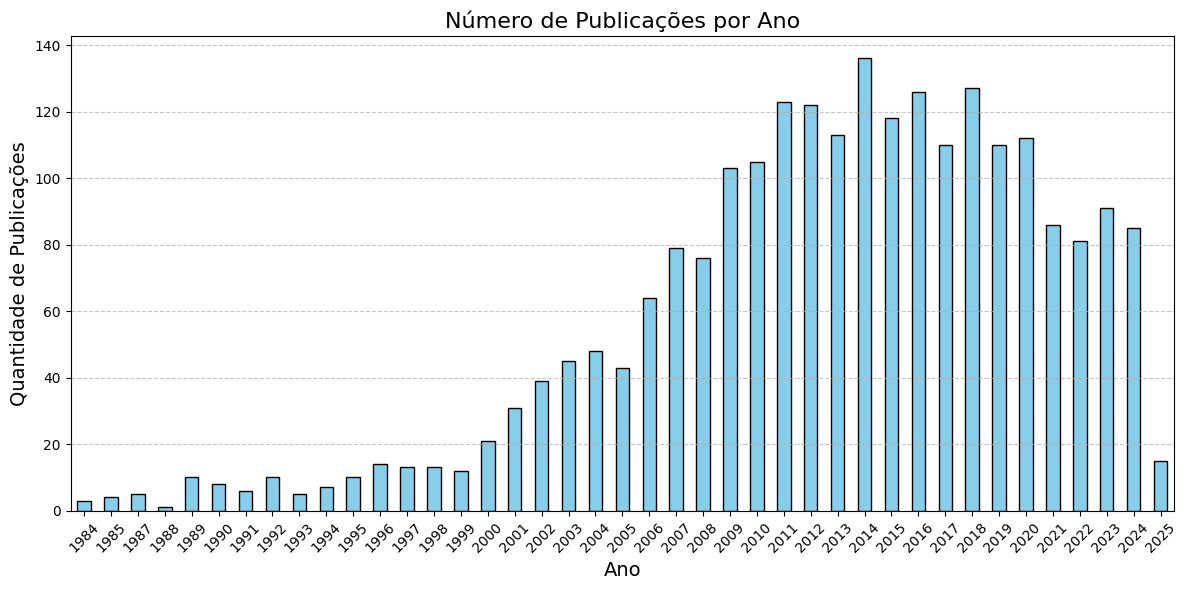

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('captura_dados/anos_publicacao.csv')

contagem_anos = df['Ano'].value_counts().sort_index()

plt.figure(figsize=(12,6))
contagem_anos.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Número de Publicações por Ano', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Quantidade de Publicações', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Regressão Linear 

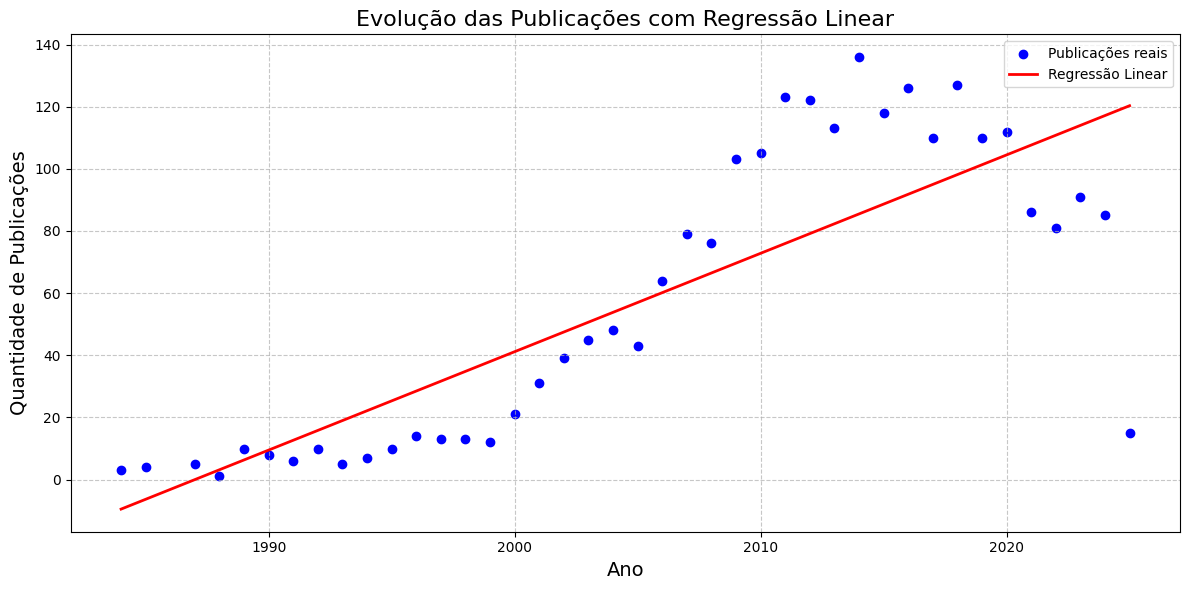

Coeficiente Angular (inclinação): 3.17
Coeficiente Linear (intercepto): -6290.79


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('captura_dados/anos_publicacao.csv')

contagem_anos = df['Ano'].value_counts().sort_index()

X = contagem_anos.index.values.reshape(-1, 1)
y = contagem_anos.values 

modelo = LinearRegression()
modelo.fit(X, y)

y_pred = modelo.predict(X)

plt.figure(figsize=(12,6))
plt.scatter(X, y, color='blue', label='Publicações reais')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regressão Linear')
plt.title('Evolução das Publicações com Regressão Linear', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Quantidade de Publicações', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(f"Coeficiente Angular (inclinação): {modelo.coef_[0]:.2f}")
print(f"Coeficiente Linear (intercepto): {modelo.intercept_:.2f}")

## Análise da Evolução da Produção Científica
Para entender a evolução da produção científica do Centro de Informática da UFPB, aplicamos uma regressão linear simples, 
utilizando o ano de publicação como variável independente e o número de artigos como variável dependente.

### A regressão resultou nos seguintes coeficientes:
Coeficiente angular (inclinação): 3,17
Coeficiente linear (intercepto): -6290,79

### Interpretação da regressão:
O coeficiente angular positivo indica uma tendência geral de crescimento ao longo dos anos: em média, a cada ano, a produção científica 
aumenta em aproximadamente 3 artigos. Isso sugere que, no longo prazo, o Centro de Informática tem se tornado mais produtivo em termos de publicações científicas.

### Análise mais profunda dos dados reais:
Embora a tendência seja de crescimento, observamos variações importantes nos dados reais:
2014 foi um ano de alta produção, com cerca de 136 artigos publicados
Em 2020, a produção caiu para 113 artigos.
De 2021 em diante, a produção estabilizou em torno de 80 artigos por ano.

### Essas flutuações podem ser explicadas por fatores externos que a regressão linear não capta, como:
Alterações no financiamento de pesquisa;
Mudanças na quantidade de professores e alunos no centro;
Impacto de eventos globais, como a pandemia de COVID-19 em 2020–2021, que afetou a produção científica em muitas instituições.

### Conclusão:
Apesar das quedas em anos recentes, a tendência histórica ainda é de crescimento, mas análises locais mostram que a produção científica 
do Centro de Informática passou por fases de crescimento, queda e estabilização, sugerindo a necessidade de uma análise contínua e atenta a fatores externos.